In [32]:
# Dependencies
import csv
import matplotlib.pyplot as plt
import matplotlib as mpl
import requests
import pandas as pd
from config import api_key
from citipy import citipy
import numpy as np

In [33]:
# Some random coordinates
coordinates_lat =np.random.randint(-90,90,size=10)
coordinates_lng = np.random.randint(-180,180,size=10)
coordinates = list(zip(coordinates_lat , coordinates_lng))

In [34]:
city_num = []
cities = []
urls = []

record_count =0
latitud =[]
temp = []
humidity = []
cloudiness = []
wind_speed =[]

data = {}

base_url = 'http://api.openweathermap.org/data/2.5/weather?'
print("Beginning Data Retreival")
print("-----------------------------------------")
for coordinate_pair in coordinates:
    lat, lon = coordinate_pair
    
    name = citipy.nearest_city(lat, lon).city_name
    
    query_url = f"{base_url}appid={api_key}&q={name}"
    response = requests.get(query_url).json()
    
    #Check if the given co-ordinates mapped to a city by checking if 'id' has been returned
    if 'id' in response:
        cities.append(name)
        urls.append(query_url)
    
        latitud.append(lat)
        temp.append(response['main']['temp'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        
        print(f"Processing record {record_count+1} of {len(coordinates)}")
        print(query_url)
        print("")
        record_count+=1

data = {
    "City": cities,
    "Latitude": latitud,
    "Temperature": temp,
    "Humidity" :humidity,
    "Cloudiness": cloudiness,
    "Wind Speed":wind_speed
    }
weather_data = pd.DataFrame(data)
weather_data.head()

Beginning Data Retreival
-----------------------------------------
Processing record 1 of 10
http://api.openweathermap.org/data/2.5/weather?appid=2b249559ecb239ca11bea12938e7b0e9&q=monteagudo

Processing record 2 of 10
http://api.openweathermap.org/data/2.5/weather?appid=2b249559ecb239ca11bea12938e7b0e9&q=marin

Processing record 3 of 10
http://api.openweathermap.org/data/2.5/weather?appid=2b249559ecb239ca11bea12938e7b0e9&q=castro

Processing record 4 of 10
http://api.openweathermap.org/data/2.5/weather?appid=2b249559ecb239ca11bea12938e7b0e9&q=kimbe

Processing record 5 of 10
http://api.openweathermap.org/data/2.5/weather?appid=2b249559ecb239ca11bea12938e7b0e9&q=yellowknife

Processing record 6 of 10
http://api.openweathermap.org/data/2.5/weather?appid=2b249559ecb239ca11bea12938e7b0e9&q=ribeira grande

Processing record 7 of 10
http://api.openweathermap.org/data/2.5/weather?appid=2b249559ecb239ca11bea12938e7b0e9&q=iqaluit

Processing record 8 of 10
http://api.openweathermap.org/data/2.

,City,Cloudiness,Humidity,Latitude,Temperature,Wind Speed
0,monteagudo,32,98,-20,290.899,1.01
1,marin,76,100,26,279.640,6.70
2,castro,76,99,-49,282.099,1.01
3,kimbe,92,100,-6,297.449,0.86
4,yellowknife,40,58,67,269.150,2.60


In [35]:
weather_data['URL Requested']=urls
weather_data.to_csv("Weather Data.csv",index=False)
weather_data.head()

,City,Cloudiness,Humidity,Latitude,Temperature,Wind Speed,URL Requested
0,monteagudo,32,98,-20,290.899,1.01,http://api.openweathermap.org/data/2.5/weather...
1,marin,76,100,26,279.640,6.70,http://api.openweathermap.org/data/2.5/weather...
2,castro,76,99,-49,282.099,1.01,http://api.openweathermap.org/data/2.5/weather...
3,kimbe,92,100,-6,297.449,0.86,http://api.openweathermap.org/data/2.5/weather...
4,yellowknife,40,58,67,269.150,2.60,http://api.openweathermap.org/data/2.5/weather...


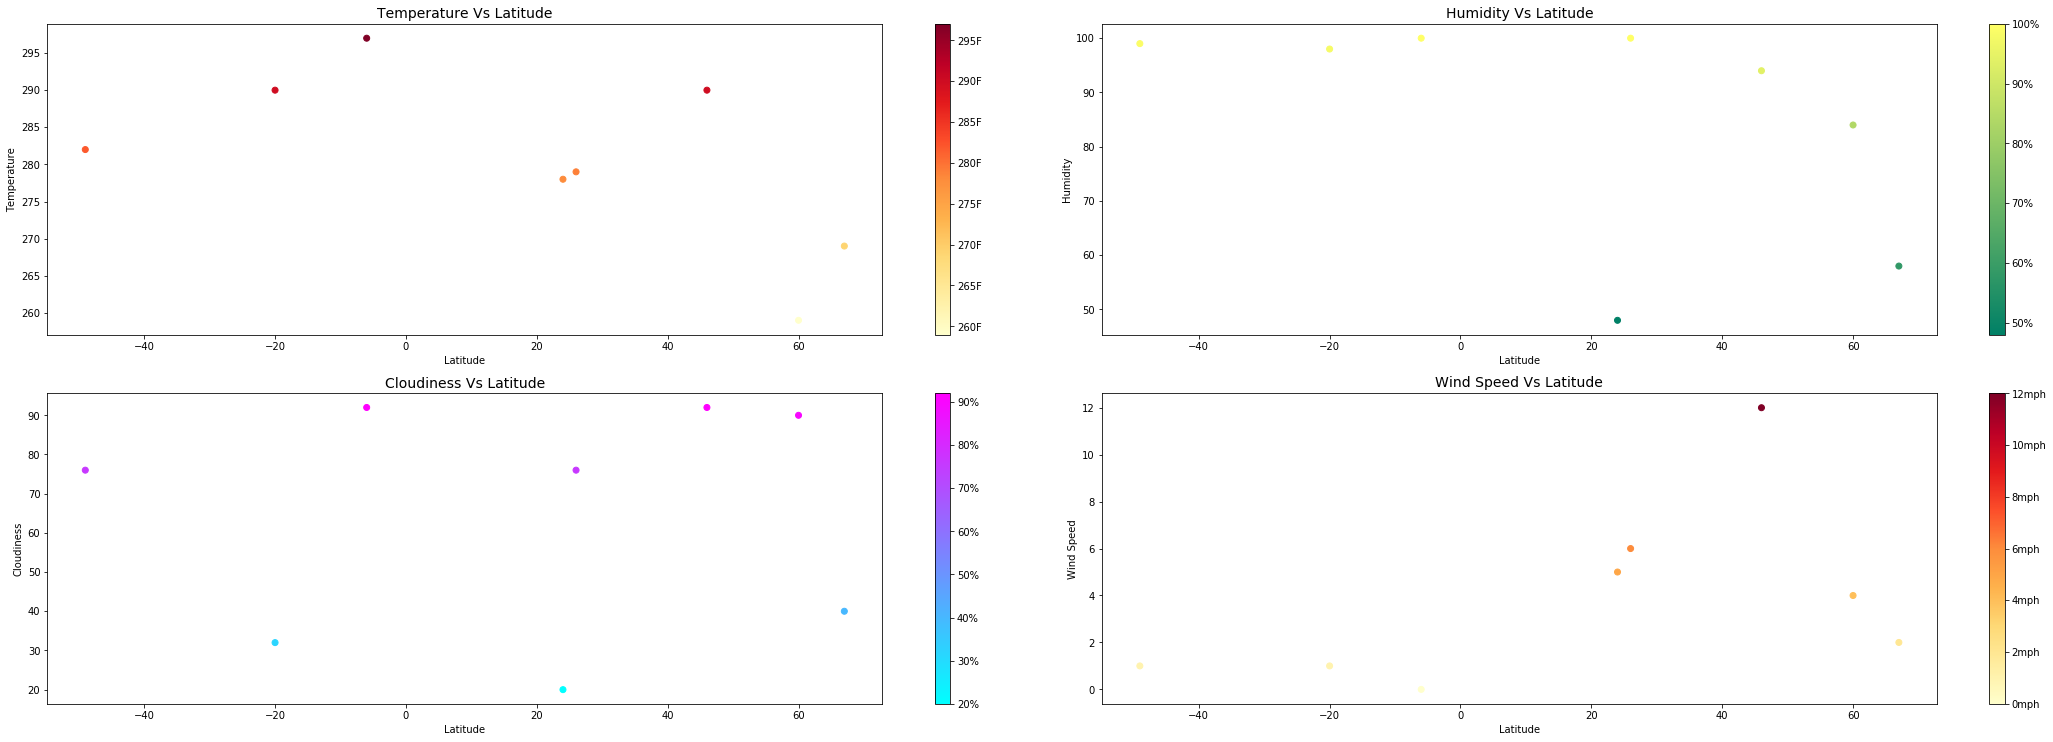

In [36]:
gridsize = (4, 2)
fig = plt.figure(figsize=(30, 20))
ax1 = plt.subplot2grid(gridsize, (1, 0))
ax2 = plt.subplot2grid(gridsize, (1, 1))
ax3 = plt.subplot2grid(gridsize, (2, 0))
ax4 = plt.subplot2grid(gridsize, (2, 1))

ax1.set_title('Temperature Vs Latitude', fontsize=14)
ax1.set_xlabel("Latitude")
ax1.set_ylabel("Temperature")
sctr = ax1.scatter(x=weather_data["Latitude"].astype(int), y=weather_data["Temperature"].astype(int), c= weather_data["Temperature"].astype(int), cmap='YlOrRd')
plt.colorbar(sctr, ax=ax1, format='%dF')

ax2.set_title('Humidity Vs Latitude', fontsize=14)
ax2.set_xlabel("Latitude")
ax2.set_ylabel("Humidity")
sctr = ax2.scatter(x=weather_data["Latitude"].astype(int), y=weather_data["Humidity"].astype(int),c= weather_data["Humidity"].astype(int), cmap='summer')
plt.colorbar(sctr, ax=ax2, format='%d%%')

ax3.set_title('Cloudiness Vs Latitude', fontsize=14)
ax3.set_xlabel("Latitude")
ax3.set_ylabel("Cloudiness")
sctr = ax3.scatter(x=weather_data["Latitude"].astype(int), y=weather_data["Cloudiness"].astype(int),c= weather_data["Cloudiness"].astype(int), cmap=mpl.cm.cool)
plt.colorbar(sctr, ax=ax3, format='%d%%')

ax4.set_title('Wind Speed Vs Latitude', fontsize=14)
ax4.set_xlabel("Latitude")
ax4.set_ylabel("Wind Speed")
sctr = ax4.scatter(x=weather_data["Latitude"].astype(int), y=weather_data["Wind Speed"].astype(int),c= weather_data["Wind Speed"].astype(int), cmap='YlOrRd')
plt.colorbar(sctr, ax=ax4, format='%dmph')

plt.tight_layout()
plt.savefig("Scatter Plots.png")